<a href="https://colab.research.google.com/github/Buggy1004/NLP-Text-Classification-using-BERT-Transformer/blob/main/Emotion_Dataset_Visualization_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install required libraries:

In [2]:
!pip install datasets

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import list_datasets, load_dataset
import warnings

pd.set_option('display.max_columns', None)
warnings.simplefilter(action="ignore")

### Load Emotion dataset:

In [4]:
emotion_dataset = load_dataset('emotion')
print("\n", emotion_dataset)

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]


 DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [5]:
print("Dataset Items: \n", emotion_dataset.items())
print("\nDataset type: \n", type(emotion_dataset))
print("\nShape of dataset: \n", emotion_dataset.shape)
print("\nNo of rows: \n", emotion_dataset.num_rows)
print("\nNo of columns: \n", emotion_dataset.num_columns)

Dataset Items: 
 dict_items([('train', Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})), ('validation', Dataset({
    features: ['text', 'label'],
    num_rows: 2000
})), ('test', Dataset({
    features: ['text', 'label'],
    num_rows: 2000
}))])

Dataset type: 
 <class 'datasets.dataset_dict.DatasetDict'>

Shape of dataset: 
 {'train': (16000, 2), 'validation': (2000, 2), 'test': (2000, 2)}

No of rows: 
 {'train': 16000, 'validation': 2000, 'test': 2000}

No of columns: 
 {'train': 2, 'validation': 2, 'test': 2}


In [6]:
emotion_train = load_dataset('emotion', split='train')
emotion_val = load_dataset('emotion', split='validation')
emotion_test = load_dataset('emotion', split='test')
print("\n\nDetails for Emotion Train Dataset: ", emotion_train.shape)
print("Details for Emotion Validation Dataset: ", emotion_val.shape)
print("Details for Emotion Test Dataset: ", emotion_test.shape)



Details for Emotion Train Dataset:  (16000, 2)
Details for Emotion Validation Dataset:  (2000, 2)
Details for Emotion Test Dataset:  (2000, 2)


In [7]:
print("\nTrain Dataset Features for Emotion: \n", emotion_train.features)
print("\nTest Dataset Features for Emotion: \n", emotion_val.features)
print("\nTest Dataset Features for Emotion: \n", emotion_test.features)


Train Dataset Features for Emotion: 
 {'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

Test Dataset Features for Emotion: 
 {'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

Test Dataset Features for Emotion: 
 {'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}


### Read sample text of different categories:

In [8]:
print(emotion_dataset['train']['text'][0])
print(emotion_dataset['train']['label'][0])
print()
print(emotion_dataset['train']['text'][6000])
print(emotion_dataset['train']['label'][6000])
print()
print(emotion_dataset['train']['text'][100])
print(emotion_dataset['train']['label'][100])
print()
print(emotion_dataset['train']['text'][3700])
print(emotion_dataset['train']['label'][3700])
print()
print(emotion_dataset['train']['text'][7100])
print(emotion_dataset['train']['label'][7100])
print()
print(emotion_dataset['train']['text'][5400])
print(emotion_dataset['train']['label'][5400])

i didnt feel humiliated
0

i feel quite content right now s i mean nothing amazing happened just a stupid frenh competition where im sure i did shit and tutor but i dontt know i feel ok
1

i wont let me child cry it out because i feel that loving her and lily when she was little was going to be opportunities that only lasted for those short few months
2

i hate being so hungry and weak that i feel stubborn and dont want to do anything productive
3

i always feel pressured to socialize or i get eight missed calls and some texts from my host brother in the span of an hour
4

i have chose for myself that makes me feel amazing
5


### Convert dataset object to DataFrame:

In [9]:
emotion_train_df = pd.DataFrame(data=emotion_train)
emotion_val_df = pd.DataFrame(data=emotion_val)
emotion_test_df = pd.DataFrame(data=emotion_test)

In [10]:
emotion_train_df.head(10)

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,1
9,i feel romantic too,2


In [11]:
emotion_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16000 non-null  object
 1   label   16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [12]:
emotion_train_df.isnull().sum()

text     0
label    0
dtype: int64

In [13]:
emotion_train_df.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
0      4666   4666                            i didnt feel humiliated    1
1      5362   5361  i feel more adventurous willing to take risks ...    2
2      1304   1304  i am ever feeling nostalgic about the fireplac...    1
3      2159   2159   im grabbing a minute to post i feel greedy wrong    1
4      1937   1937  i feel as confused about life as a teenager or...    1
5       572    572  ive been taking or milligrams or times recomme...    1

In [14]:
label_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

### Create new feature:

In [15]:
emotion_train_df["text_length"] = emotion_train_df["text"].apply(len)
emotion_train_df.head()

,text,label,text_length
0,i didnt feel humiliated,0,23
1,i can go from feeling so hopeless to so damned...,0,108
2,im grabbing a minute to post i feel greedy wrong,3,48
3,i am ever feeling nostalgic about the fireplac...,2,92
4,i am feeling grouchy,3,20


### Data Visualization:

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Axes: ylabel='Frequency'>

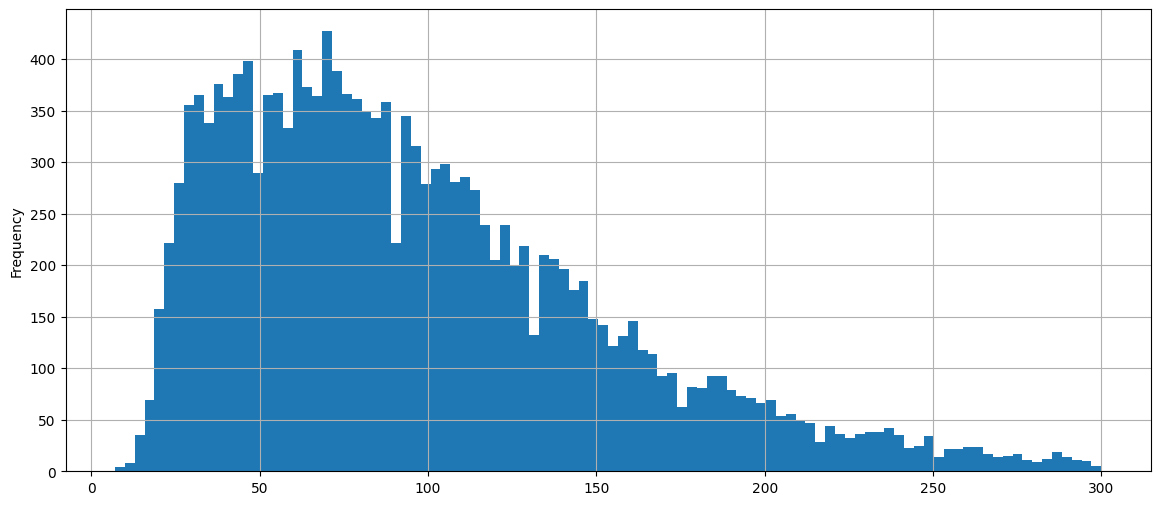

In [17]:
plt.figure(figsize=(14,6))
emotion_train_df["text_length"].plot.hist(bins=100, grid=True)

In [18]:
label_dict = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}
emotion_train_df["label_names"] = emotion_train_df["label"].map(label_dict)
emotion_train_df.head()

,text,label,text_length,label_names
0,i didnt feel humiliated,0,23,sadness
1,i can go from feeling so hopeless to so damned...,0,108,sadness
2,im grabbing a minute to post i feel greedy wrong,3,48,anger
3,i am ever feeling nostalgic about the fireplac...,2,92,love
4,i am feeling grouchy,3,20,anger


array([[<Axes: title={'center': 'anger'}>,
        <Axes: title={'center': 'fear'}>],
       [<Axes: title={'center': 'joy'}>,
        <Axes: title={'center': 'love'}>],
       [<Axes: title={'center': 'sadness'}>,
        <Axes: title={'center': 'surprise'}>]], dtype=object)

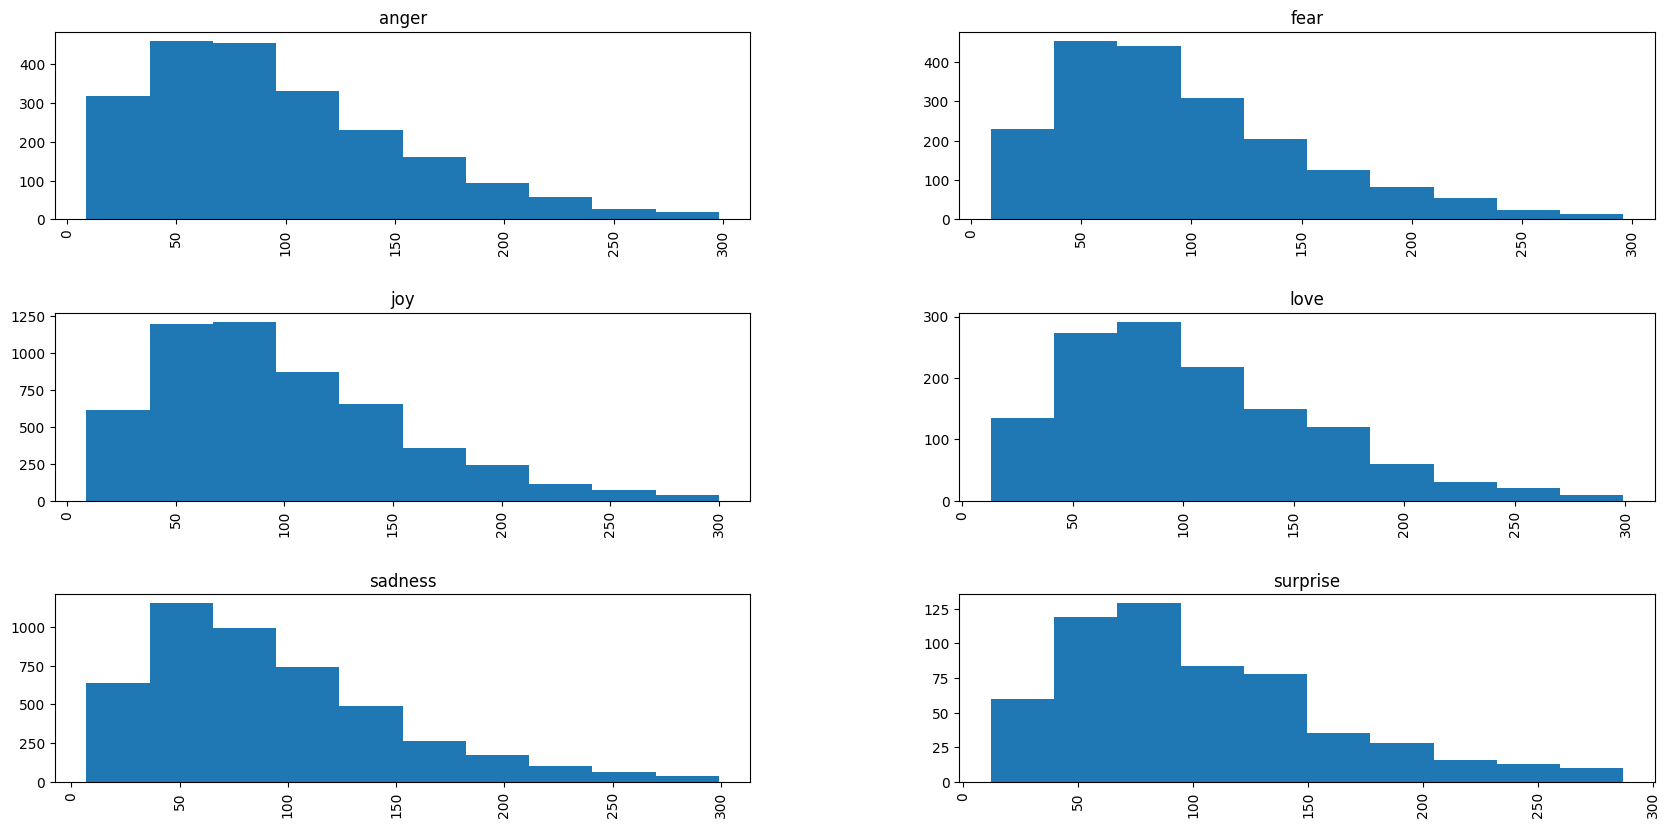

In [19]:
emotion_train_df.hist(column="text_length", by="label_names", figsize=(20,10), grid=True)

In [20]:
print(emotion_val_df.isnull().sum())
print(emotion_test_df.isnull().sum())

text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


In [21]:
emotion_val_df.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
0       550    550  im feeling quite sad and sorry for myself but ...    1
1       704    704  i can have for a treat or if i am feeling festive    1
2       178    178                     i feel like a faithful servant    1
3       275    275                  i am just feeling cranky and blue    1
4       212    212  i just know to begin with i am going to feel s...    1
5        81     81                     i feel a funny mix of emotions    1

In [22]:
emotion_test_df.groupby("label").describe()

text                                                               
      count unique                                                top freq
label                                                                     
0       581    581  im feeling rather rotten so im not very ambiti...    1
1       695    695  i left with my bouquet of red and yellow tulip...    1
2       159    159  i find myself in the odd position of feeling s...    1
3       275    275   i felt anger when at the end of a telephone call    1
4       224    224  i cant walk into a shop anywhere where i do no...    1
5        66     66  i feel a little stunned but can t imagine what...    1

In [23]:
emotion_val_df["text_length"] = emotion_val_df["text"].apply(len)
emotion_val_df["label_names"] = emotion_val_df["label"].map(label_dict)
emotion_val_df.head()

,text,label,text_length,label_names
0,im feeling quite sad and sorry for myself but ...,0,69,sadness
1,i feel like i am still looking at a blank canv...,0,70,sadness
2,i feel like a faithful servant,2,30,love
3,i am just feeling cranky and blue,3,33,anger
4,i can have for a treat or if i am feeling festive,1,49,joy


In [24]:
emotion_test_df["text_length"] = emotion_test_df["text"].apply(len)
emotion_test_df["label_names"] = emotion_test_df["label"].map(label_dict)
emotion_test_df.head()

,text,label,text_length,label_names
0,im feeling rather rotten so im not very ambiti...,0,59,sadness
1,im updating my blog because i feel shitty,0,41,sadness
2,i never make her separate from me because i do...,0,97,sadness
3,i left with my bouquet of red and yellow tulip...,1,113,joy
4,i was feeling a little vain when i did this one,0,47,sadness


<Axes: ylabel='Frequency'>

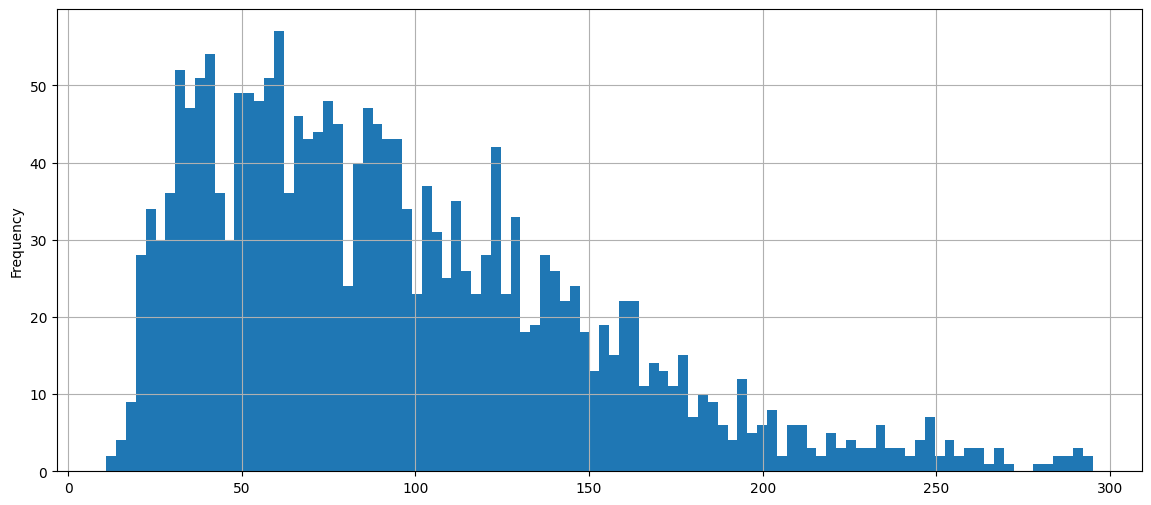

In [25]:
plt.figure(figsize=(14,6))
emotion_val_df["text_length"].plot.hist(bins=100, grid=True)

<Axes: ylabel='Frequency'>

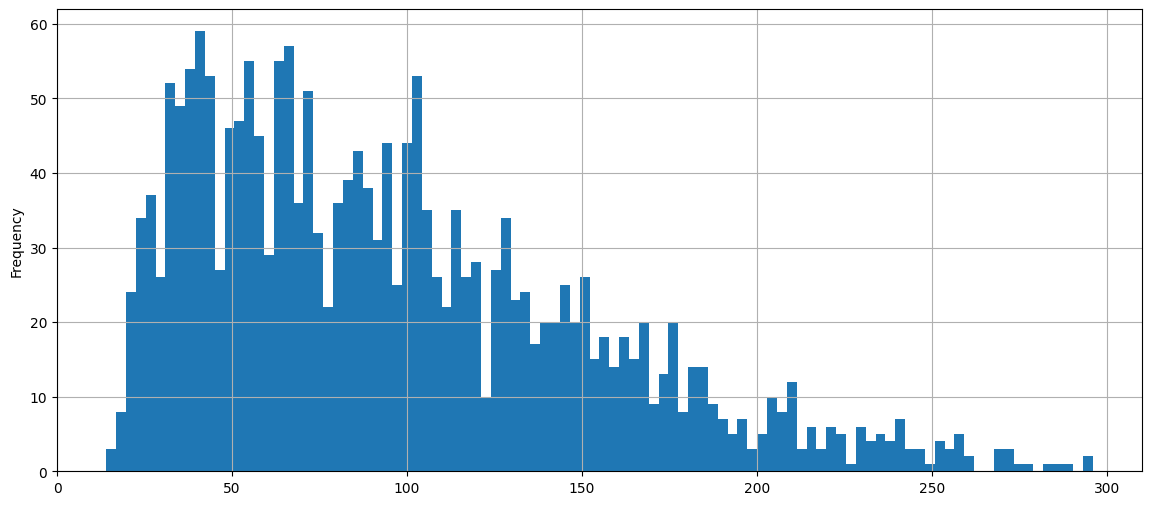

In [26]:
plt.figure(figsize=(14,6))
emotion_test_df["text_length"].plot.hist(bins=100, grid=True)

array([[<Axes: title={'center': 'anger'}>,
        <Axes: title={'center': 'fear'}>],
       [<Axes: title={'center': 'joy'}>,
        <Axes: title={'center': 'love'}>],
       [<Axes: title={'center': 'sadness'}>,
        <Axes: title={'center': 'surprise'}>]], dtype=object)

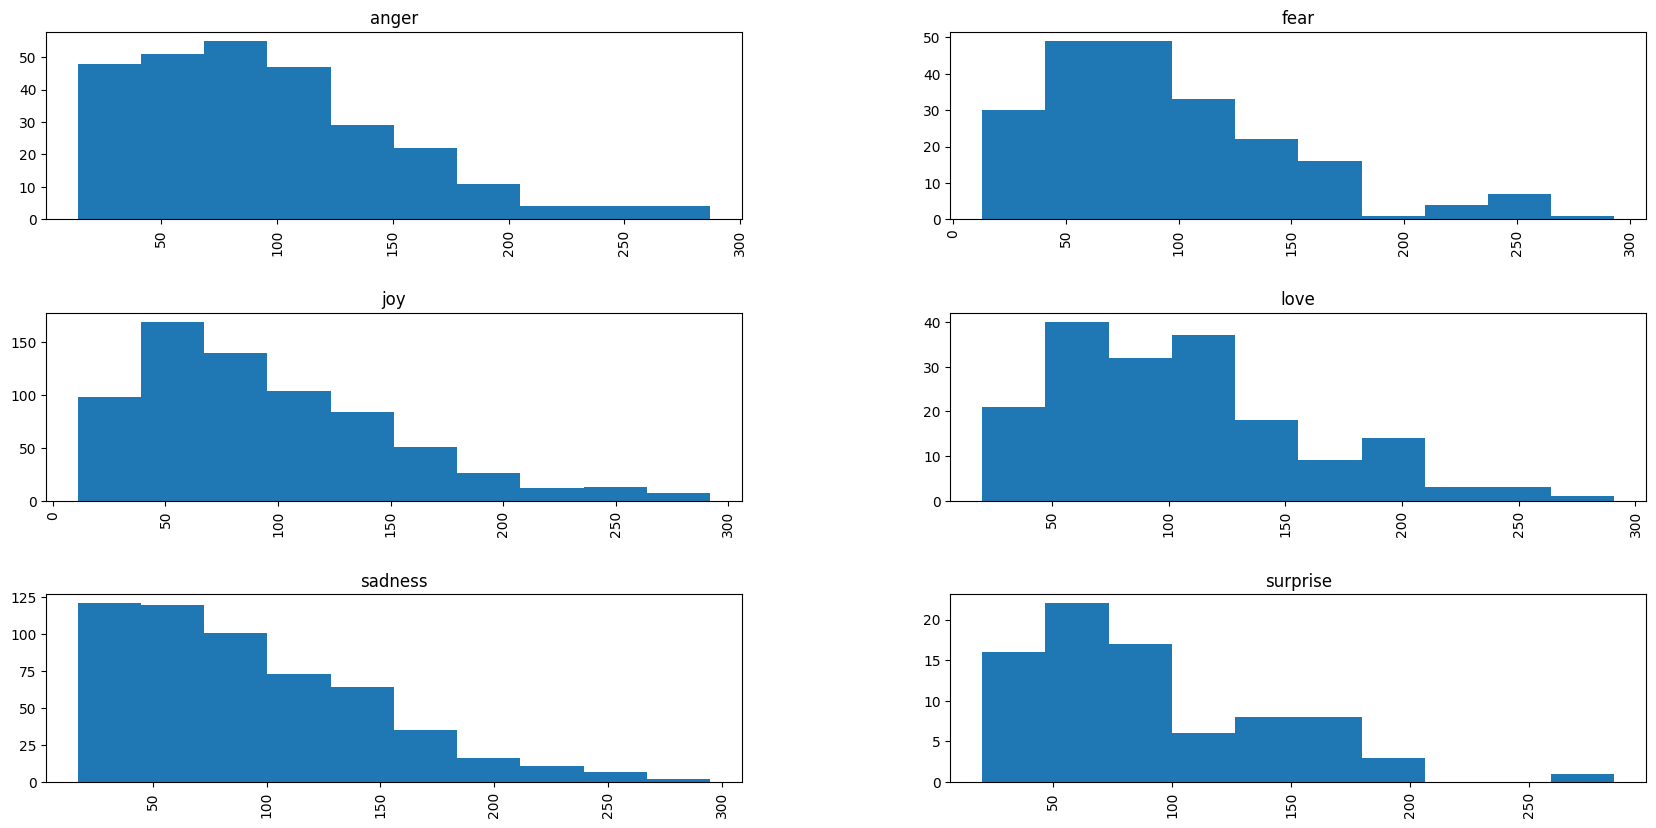

In [27]:
emotion_val_df.hist(column="text_length", by="label_names", figsize=(20,10), grid=True)

array([[<Axes: title={'center': 'anger'}>,
        <Axes: title={'center': 'fear'}>],
       [<Axes: title={'center': 'joy'}>,
        <Axes: title={'center': 'love'}>],
       [<Axes: title={'center': 'sadness'}>,
        <Axes: title={'center': 'surprise'}>]], dtype=object)

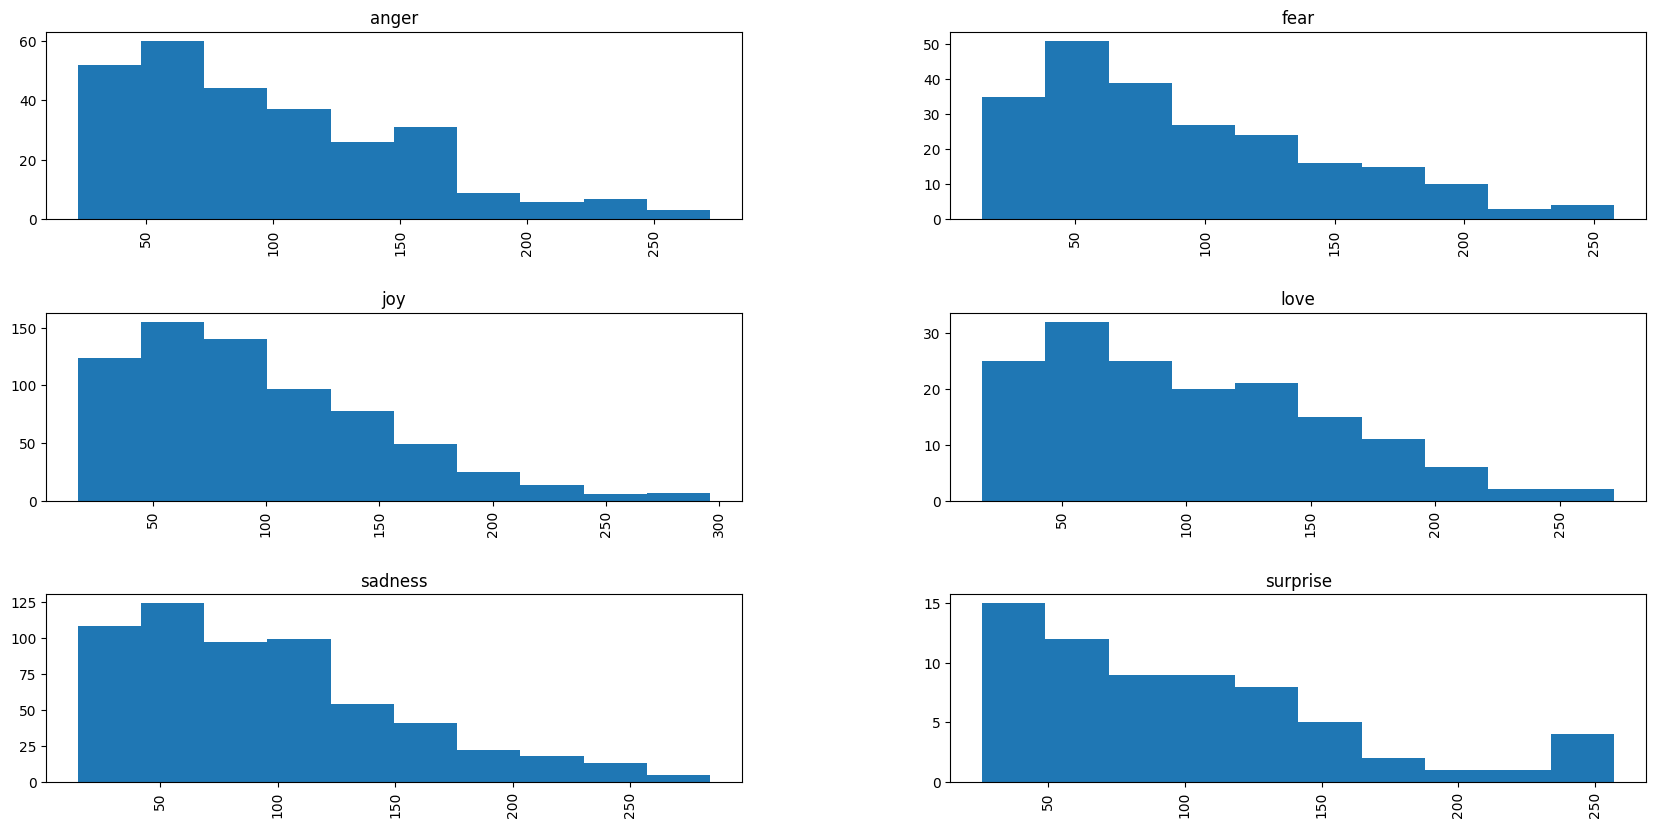

In [28]:
emotion_test_df.hist(column="text_length", by="label_names", figsize=(20,10), grid=True)